In [356]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
train = pd.read_csv("train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [358]:
test = pd.read_csv("test.csv")
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Data Exploration

In [359]:
null_count = train.isnull().sum()
features_w_nulls = null_count[null_count > 0]
features_w_nulls

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [360]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

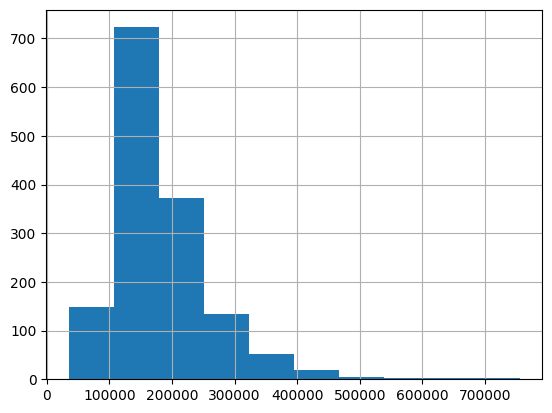

In [361]:
train['SalePrice'].hist()

Data Preprocessing

In [362]:
train['log_SalePrice'] = np.log(train['SalePrice'])

In [363]:
train['log_SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: log_SalePrice, dtype: float64

<Axes: >

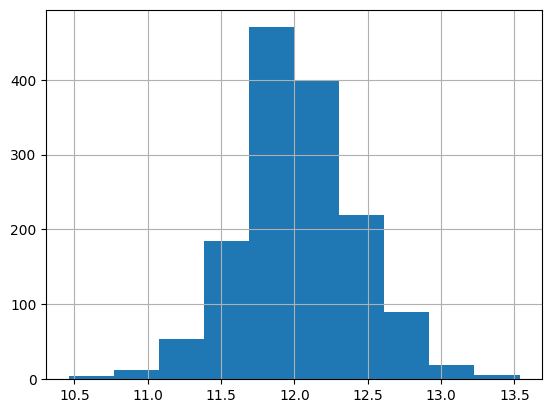

In [364]:
train['log_SalePrice'].hist()

In [365]:
train_current_columns = train.columns.tolist()

train_standardize_yr = [column.replace("Year", "Yr") for column in train_current_columns]

train.columns = train_standardize_yr

test_current_columns = test.columns.tolist()

test_standardize_yr = [column.replace("Year", "Yr") for column in test_current_columns]

test.columns = test_standardize_yr

In [366]:
train_numeric_features = train.select_dtypes(include= ["int", "float"]).columns.to_list()
train_numeric_features = [feature for feature in train_numeric_features if feature not in ["Id", "SalePrice", "log_SalePrice"]]
train_numeric_feature_df = train[train_numeric_features]

test_numeric_features = test.select_dtypes(include= ["int", "float"]).columns.to_list()
test_numeric_features = [feature for feature in test_numeric_features if feature not in ["Id", "SalePrice", "log_SalePrice"]]
test_numeric_feature_df = test[test_numeric_features]

In [367]:
train_numeric_null_count = train_numeric_feature_df.isnull().sum()
train_numeric_null_count = train_numeric_null_count[train_numeric_null_count > 0]
train_numeric_null_columns = train_numeric_null_count.index.tolist()

test_numeric_null_count = test_numeric_feature_df.isnull().sum()
test_numeric_null_count = test_numeric_null_count[test_numeric_null_count > 0]
test_numeric_null_columns = test_numeric_null_count.index.tolist()


In [368]:
binary_features = [feature for feature in train.columns if train[feature].nunique() == 2]
binary_feature_df = train[binary_features]
binary_feature_df

,Street,Alley,Utilities,CentralAir
0,Pave,NaN,AllPub,Y
1,Pave,NaN,AllPub,Y
2,Pave,NaN,AllPub,Y
3,Pave,NaN,AllPub,Y
4,Pave,NaN,AllPub,Y
...,...,...,...,...
1455,Pave,NaN,AllPub,Y
1456,Pave,NaN,AllPub,Y
1457,Pave,NaN,AllPub,Y
1458,Pave,NaN,AllPub,Y


In [369]:
train_non_numeric_features = [feature for feature in train.columns if feature not in train_numeric_features and feature not in ["Id", "SalePrice", "log_SalePrice"]]
train_non_numeric_feature_df = train[train_non_numeric_features]

test_non_numeric_features = [feature for feature in test.columns if feature not in test_numeric_features and feature not in ["Id", "SalePrice", "log_SalePrice"]]
test_non_numeric_feature_df = test[test_non_numeric_features]


In [370]:
train_non_numeric_null_count = train_non_numeric_feature_df.isnull().sum()
train_non_numeric_null_count = train_non_numeric_null_count[train_non_numeric_null_count > 0]
train_non_numeric_null_columns = train_non_numeric_null_count.index.tolist()

test_non_numeric_null_count = test_non_numeric_feature_df.isnull().sum()
test_non_numeric_null_count = test_non_numeric_null_count[test_non_numeric_null_count > 0]
test_non_numeric_null_columns = test_non_numeric_null_count.index.tolist()

In [371]:
def fill_non_numeric_na_values(x):
    if pd.isna(x) or x == '' or str(x).lower() == 'nan':
        return "None"
    else:
        return x

In [372]:
def fill_numeric_na_values(x):
    if pd.isna(x) or x == '' or str(x).lower() == 'nan':
        return 0
    else:
        return x

In [373]:
for column in train_non_numeric_null_columns:
    train[column] = train[column].apply(fill_non_numeric_na_values)

for column in test_non_numeric_null_columns:
    test[column] = test[column].apply(fill_non_numeric_na_values)

In [374]:
for column in train_numeric_null_columns:
    train[column] = train[column].apply(fill_numeric_na_values)

for column in test_numeric_null_columns:
    test[column] = test[column].apply(fill_numeric_na_values)

In [375]:
numeric_summary = pd.DataFrame({
    "min" : train_numeric_feature_df.min(),
    "max" : train_numeric_feature_df.max(),
    "range" : train_numeric_feature_df.max() - train_numeric_feature_df.min()
})

numeric_summary = numeric_summary.sort_values('range', ascending = False)

numeric_summary

,min,max,range
LotArea,1300.0,215245.0,213945.0
MiscVal,0.0,15500.0,15500.0
TotalBsmtSF,0.0,6110.0,6110.0
BsmtFinSF1,0.0,5644.0,5644.0
GrLivArea,334.0,5642.0,5308.0
1stFlrSF,334.0,4692.0,4358.0
BsmtUnfSF,0.0,2336.0,2336.0
2ndFlrSF,0.0,2065.0,2065.0
MasVnrArea,0.0,1600.0,1600.0
BsmtFinSF2,0.0,1474.0,1474.0


In [376]:
binary_features = [
    ('GarageArea', 'HasGarage'),
    ('TotalBsmtSF', 'HasBasement'),
    ('PoolArea', 'HasPool'),
    ('Fireplaces', 'HasFireplace'),
    ('WoodDeckSF', 'HasWoodDeck'),
    ('OpenPorchSF', 'HasOpenPorch'),
    ('EnclosedPorch', 'HasEnclosedPorch'),
    ('3SsnPorch', 'Has3SsnPorch'),
    ('ScreenPorch', 'HasScreenPorch'),
    ('MasVnrArea', 'HasMasVnr'),
    ('2ndFlrSF', 'Has2ndFloor'),
    ('LowQualFinSF', 'HasLowQualFinSF'),
    ('Alley', 'HasAlley'),
    ('Fence', 'HasFence'),
    ('MiscFeature', 'HasMisc')
]

In [377]:
for original_feature, new_feature in binary_features:
    if original_feature in train.columns:
        if train[original_feature].dtype in ['int64', 'float64']:
            train[new_feature] = (train[original_feature] > 0).astype(int)
        else:
            train[new_feature] = (~train[original_feature].isna()).astype(int)
        
for original_feature, new_feature in binary_features:
    if original_feature in test.columns:
        if test[original_feature].dtype in ['int64', 'float64']:
            test[new_feature] = (test[original_feature] > 0).astype(int)
        else:
            test[new_feature] = (~test[original_feature].isna()).astype(int)


In [378]:
log_transform = ['LotArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GrLivArea', '1stFlrSF', 
                 'BsmtUnfSF', '2ndFlrSF', 'MasVnrArea', 'BsmtFinSF2', 'GarageArea']

for col in log_transform:
    train[f'Log_{col}'] = np.log1p(train[col])

for col in log_transform:
    test[f'Log_{col}'] = np.log1p(test[col])

In [379]:
features_to_drop = [feature for feature in log_transform if feature in train.columns]
features_to_drop

['LotArea',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'GrLivArea',
 '1stFlrSF',
 'BsmtUnfSF',
 '2ndFlrSF',
 'MasVnrArea',
 'BsmtFinSF2',
 'GarageArea']

In [380]:
train = train.drop(columns= features_to_drop)

test = test.drop(columns= features_to_drop)

In [381]:
train_post_log_numeric_columns = train.select_dtypes(include= ['int64', 'float64']).columns
test_post_log_numeric_columns = test.select_dtypes(include= ['int64', 'float64']).columns
train_encoded = pd.get_dummies(train, columns= train.columns.drop(train_post_log_numeric_columns), dummy_na = True, drop_first= True)
test = pd.get_dummies(test, columns= test.columns.drop(test_post_log_numeric_columns), dummy_na = True, drop_first= True)

Split into Train and Test Data

In [382]:
x = train_encoded.drop(['SalePrice', 'log_SalePrice'], axis= 1)
y = train_encoded['log_SalePrice']

In [383]:
train_columns = list(x.columns)
test_columns = list(test.columns)

columns_to_remove = [col for col in train_columns if col not in test_columns]

dropped_columns = []
for col in columns_to_remove:
    try:
        x = x.drop(columns=[col])
        dropped_columns.append(col)
    except KeyError:
        print(f"Column '{col}' not found in train DataFrame")

In [384]:
columns_to_remove = [col for col in test_columns if col not in train_columns]

dropped_columns = []
for col in columns_to_remove:
    try:
        test = test.drop(columns=[col])
        dropped_columns.append(col)
    except KeyError:
        print(f"Column '{col}' not found in test DataFrame")

In [385]:
x_null= x.isna().sum()
x_null= x_null[x_null > 0]
x_null

Series([], dtype: int64)

In [386]:
test_null= test.isna().sum()
test_null= test_null[test_null > 0]
test_null

Series([], dtype: int64)

In [387]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

In [388]:
model= LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [389]:
y_pred= model.predict(x_test)

In [390]:
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 0.020070919444395315
R-Squared: 0.8924465942615509


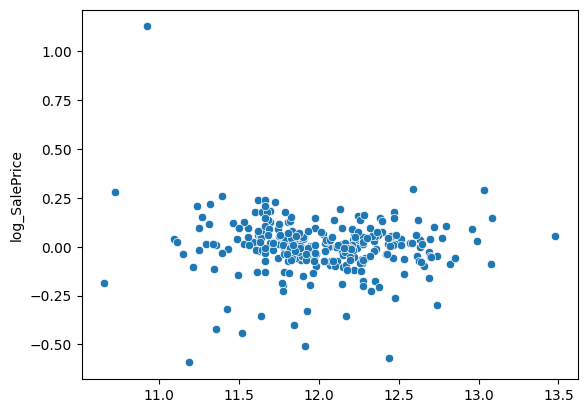

In [391]:
residuals = y_test - y_pred
sns.scatterplot(x= y_pred, y= residuals)
plt.show()

In [392]:
feature_importance= pd.DataFrame({
    'feature': x.columns,
    'importance': abs(model.coef_)
})

important_features= feature_importance[feature_importance['importance'] > 0.1]['feature'].tolist()

important_features

['HasBasement',
 'HasPool',
 'Has2ndFloor',
 'Log_TotalBsmtSF',
 'Log_GrLivArea',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotConfig_FR3',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NWAmes',
 'Neighborhood_OldTown',
 'Condition2_Feedr',
 'Condition2_PosA',
 'Condition2_PosN',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkComm',
 'Exterior2nd_CmentBd',
 'Exterior2nd_Stucco',
 'Foundation_Wood',
 'BsmtQual_None',
 'BsmtCond_None',
 'BsmtCond_Po',
 'BsmtExposure_None',
 'BsmtFinType1_None',
 'BsmtFinType2_None',
 'Heating_Grav',
 'Electrical_FuseP',
 'Functional_Maj2',
 'Functional_Sev',
 'GarageType_CarPort',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_TA',
 'PoolQC_Gd',
 'PoolQC_None',
 'SaleType_ConLD',
 'SaleType_Oth',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca']

In [393]:
x_important= x[important_features]
x_important

,HasBasement,HasPool,Has2ndFloor,Log_TotalBsmtSF,Log_GrLivArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_FR3,...,GarageType_CarPort,GarageCond_Fa,GarageCond_Gd,GarageCond_TA,PoolQC_Gd,PoolQC_None,SaleType_ConLD,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca
0,1,0,1,6.753438,7.444833,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
1,1,0,0,7.141245,7.141245,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
2,1,0,1,6.825460,7.488294,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
3,1,0,1,6.629363,7.448916,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
4,1,0,1,7.044033,7.695758,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,1,6.860664,7.407318,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
1456,1,0,0,7.341484,7.637234,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
1457,1,0,1,7.050123,7.758333,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
1458,1,0,0,6.983790,6.983790,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False


In [394]:
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced= train_test_split(x_important, y, test_size= 0.2, random_state= 42)

In [395]:
reduced_model= LinearRegression()

reduced_model.fit(x_train_reduced, y_train_reduced)

LinearRegression()

In [396]:
y_pred_reduced= reduced_model.predict(x_test_reduced)

In [397]:
mse= mean_squared_error(y_test_reduced, y_pred_reduced)
r2= r2_score(y_test_reduced, y_pred_reduced)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 0.042335027726818304
R-Squared: 0.7731406163695975


In [398]:
full_model_scores= -cross_val_score(model, x, y, cv= 5, scoring= 'neg_mean_squared_error')

reduced_model_scores= -cross_val_score(reduced_model, x_important, y, cv= 5, scoring= 'neg_mean_squared_error')

print("Full model MSE scores:", full_model_scores)
print("Full model mean MSE:", full_model_scores.mean())
print("\nReduced model MSE scores:", reduced_model_scores)
print("Reduced model mean MSE:", reduced_model_scores.mean())

Full model MSE scores: [0.01440658 0.02441367 0.02885849 0.01419065 0.02271792]
Full model mean MSE: 0.0209174623483565

Reduced model MSE scores: [3.33032534e-02 4.77376803e-02 1.11613612e+22 4.25063168e-02
 4.69914338e-02]
Reduced model mean MSE: 2.2322722329860055e+21


In [399]:
ridge_model= Ridge(alpha= 1.0)
ridge_scores= cross_val_score(ridge_model, x, y, cv= 5, scoring= 'neg_mean_squared_error')
ridge_scores= -ridge_scores

print("Ridge Regression MSE scores:", ridge_scores)
print("Ridge Regression mean MSE:", ridge_scores.mean())

Ridge Regression MSE scores: [0.01272118 0.0204414  0.01855603 0.01278084 0.02251501]
Ridge Regression mean MSE: 0.017402892106391746


In [400]:
ridge_model.fit(x_train, y_train)

y_pred_ridge= ridge_model.predict(x_test)

In [401]:
ridge_mse= mean_squared_error(y_test, y_pred)
ridge_r2= r2_score(y_test, y_pred)
print(f"Mean Squared Error: {ridge_mse}")
print(f"R-Squared: {ridge_r2}")

Mean Squared Error: 0.020070919444395315
R-Squared: 0.8924465942615509


In [402]:
y_test_pred= ridge_model.predict(test)

In [403]:
y_test_pred= np.exp(y_test_pred)

In [406]:
housing_price_predictions= pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': y_test_pred
}, index= test.index)

housing_price_predictions

,Id,SalePrice
0,1461,117237.778490
1,1462,157890.921482
2,1463,184811.869060
3,1464,196340.350956
4,1465,205753.262549
...,...,...
1454,2915,83052.520816
1455,2916,82076.932501
1456,2917,172352.081661
1457,2918,118198.949578


In [407]:
housing_price_predictions.to_csv("housing_price_predictions.csv", index= False)